<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

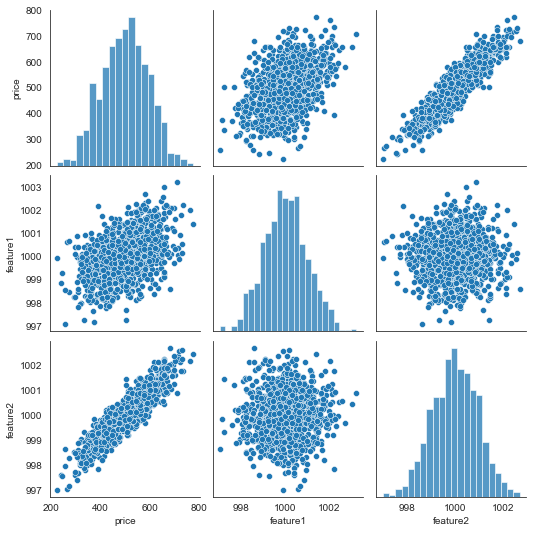

In [4]:
sns.set_style('white')
sns.pairplot(df)

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [7]:
X_train.shape

(750, 2)

In [8]:
X_test.shape

(250, 2)

In [9]:
y_train.shape

(750,)

In [10]:
y_test.shape

(250,)

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to False to perfor

In [13]:
scaler = MinMaxScaler()

In [14]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [14]:
scaler.fit(X_train)

MinMaxScaler()

In [15]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train

array([[0.37979357, 0.50659872],
       [0.27945211, 0.47794684],
       [0.3483822 , 0.67249317],
       ...,
       [0.54913363, 0.78470227],
       [0.2834197 , 0.38107935],
       [0.56282703, 0.41595995]])

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [17]:
import tensorflow as tf

In [18]:
from tensorflow.keras.models import Sequential

In [19]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evalua

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [21]:
# Cant comment out a layer

model = Sequential([
    Dense(units=4,activation='relu'),
    Dense(units=2,activation='relu'),
    Dense(units=1)
])

2021-12-27 10:48:13.765327: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-27 10:48:13.765523: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Model - adding in layers one by one

In [22]:
# Can comment out a layer

model = Sequential()

model.add(Dense(4,activation='relu'))
# model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1))

Let's go ahead and build a simple model and then compile it by defining our solver

In [23]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [24]:
model.fit(X_train,y_train,epochs=250)

2021-12-27 10:52:26.900399: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/250
24/24 [==============================] - 0s 751us/step - loss: 255148.0969
Epoch 2/250
24/24 [==============================] - 0s 666us/step - loss: 259502.9188
Epoch 3/250
24/24 [==============================] - 0s 669us/step - loss: 260335.1856
Epoch 4/250
24/24 [==============================] - 0s 592us/step - loss: 255399.3225
Epoch 5/250
24/24 [==============================] - 0s 548us/step - loss: 256764.5300
Epoch 6/250
24/24 [==============================] - 0s 515us/step - loss: 254494.0763
Epoch 7/250
24/24 [==============================] - 0s 522us/step - loss: 250755.0881
Epoch 8/250
24/24 [==============================] - 0s 507us/step - loss: 252741.6581
Epoch 9/250
24/24 [==============================] - 0s 536us/step - loss: 257410.9763
Epoch 10/250
24/24 [==============================] - 0s 547us/step - loss: 247399.8400
Epoch 11/250
24/24 [==============================] - 0s 529us/step - loss: 252321.6013
Epoch 12/250
24/24 [=====================

24/24 [==============================] - 0s 481us/step - loss: 570.0775
Epoch 96/250
24/24 [==============================] - 0s 492us/step - loss: 539.3313
Epoch 97/250
24/24 [==============================] - 0s 494us/step - loss: 507.3292
Epoch 98/250
24/24 [==============================] - 0s 497us/step - loss: 441.7581
Epoch 99/250
24/24 [==============================] - 0s 465us/step - loss: 463.2414
Epoch 100/250
24/24 [==============================] - 0s 505us/step - loss: 435.3749
Epoch 101/250
24/24 [==============================] - 0s 508us/step - loss: 374.3022
Epoch 102/250
24/24 [==============================] - 0s 470us/step - loss: 377.7015
Epoch 103/250
24/24 [==============================] - 0s 469us/step - loss: 367.4416
Epoch 104/250
24/24 [==============================] - 0s 475us/step - loss: 341.3365
Epoch 105/250
24/24 [==============================] - 0s 473us/step - loss: 323.4780
Epoch 106/250
24/24 [==============================] - 0s 470us/step - l

24/24 [==============================] - 0s 479us/step - loss: 25.2797
Epoch 192/250
24/24 [==============================] - 0s 476us/step - loss: 24.6111
Epoch 193/250
24/24 [==============================] - 0s 470us/step - loss: 25.0115
Epoch 194/250
24/24 [==============================] - 0s 460us/step - loss: 23.8280
Epoch 195/250
24/24 [==============================] - 0s 450us/step - loss: 25.8050
Epoch 196/250
24/24 [==============================] - 0s 468us/step - loss: 24.3709
Epoch 197/250
24/24 [==============================] - 0s 486us/step - loss: 26.0337
Epoch 198/250
24/24 [==============================] - 0s 462us/step - loss: 23.8295
Epoch 199/250
24/24 [==============================] - 0s 501us/step - loss: 23.8461
Epoch 200/250
24/24 [==============================] - 0s 507us/step - loss: 23.5573
Epoch 201/250
24/24 [==============================] - 0s 487us/step - loss: 25.2109
Epoch 202/250
24/24 [==============================] - 0s 489us/step - loss: 23

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [25]:
model.history.history

{'loss': [256283.25,
  256103.109375,
  255894.703125,
  255644.5,
  255339.40625,
  254918.609375,
  254407.46875,
  253807.828125,
  253112.859375,
  252296.1875,
  251358.359375,
  250274.640625,
  249056.828125,
  247676.984375,
  246125.609375,
  244399.65625,
  242479.0,
  240359.65625,
  238033.21875,
  235488.390625,
  232708.125,
  229680.0625,
  226408.484375,
  222883.671875,
  219098.09375,
  215038.90625,
  210659.109375,
  206040.46875,
  201125.25,
  195901.1875,
  190379.78125,
  184576.59375,
  178515.765625,
  172148.28125,
  165502.3125,
  158562.796875,
  151347.984375,
  143956.359375,
  136296.390625,
  128422.4921875,
  120373.1171875,
  112236.609375,
  103942.0703125,
  95497.3359375,
  87076.65625,
  78744.515625,
  70384.5625,
  62166.31640625,
  54122.58203125,
  46378.66015625,
  38945.34765625,
  31880.994140625,
  25407.810546875,
  19519.310546875,
  14341.6669921875,
  9945.009765625,
  6466.40087890625,
  3954.6806640625,
  2447.57470703125,
  1839.755

,loss
0,256283.250000
1,256103.109375
2,255894.703125
3,255644.500000
4,255339.406250
...,...
245,24.715355
246,24.189287
247,24.280411
248,24.192701


<AxesSubplot:>

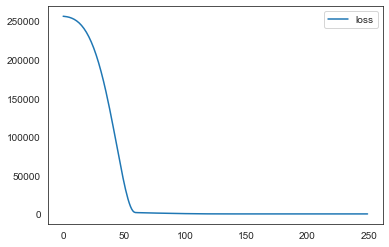

In [26]:
loss = model.history.history['loss']
loss_df = pd.DataFrame(model.history.history)
display(loss_df)
loss_df.plot()

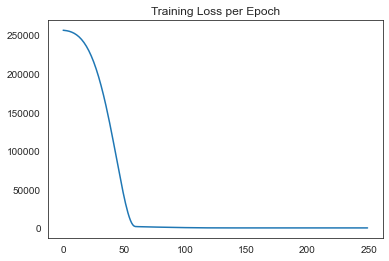

In [27]:
sns.lineplot(x=range(len(loss)),y=loss)
sns.set_style('white')
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [28]:
model.metrics_names

['loss']

In [29]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [30]:
training_score

26.844924926757812

In [31]:
test_score

28.05811309814453

### Further Evaluations

In [32]:
test_predictions = model.predict(X_test)
test_predictions

array([[403.92813],
       [621.7613 ],
       [590.4494 ],
       [570.46356],
       [365.17154],
       [577.46216],
       [513.32855],
       [457.7051 ],
       [547.5293 ],
       [446.15195],
       [610.0338 ],
       [547.46576],
       [417.7001 ],
       [407.4647 ],
       [649.57465],
       [435.92102],
       [507.02402],
       [657.9495 ],
       [660.6731 ],
       [563.9327 ],
       [332.92108],
       [443.38718],
       [381.1489 ],
       [377.45132],
       [564.91473],
       [608.7565 ],
       [530.76337],
       [426.4706 ],
       [653.51215],
       [412.765  ],
       [441.26413],
       [483.61478],
       [437.00153],
       [679.8876 ],
       [423.46204],
       [416.23474],
       [500.5496 ],
       [548.84985],
       [508.05157],
       [393.86542],
       [616.8573 ],
       [415.29132],
       [602.73663],
       [444.63242],
       [500.44028],
       [580.18896],
       [667.2627 ],
       [488.9404 ],
       [317.45462],
       [483.8981 ],


In [33]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
245,515.778446
246,462.881631
247,507.434391
248,467.460596


In [34]:
test_predictions = pd.Series(test_predictions.reshape(250,))
test_predictions

0      403.928131
1      621.761292
2      590.449402
3      570.463562
4      365.171539
          ...    
245    517.177368
246    456.012787
247    504.368256
248    459.681580
249    590.125000
Length: 250, dtype: float32

In [35]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test Y','Model Predictions']
pred_df

,Test Y,Model Predictions
0,402.296319,403.928131
1,624.156198,621.761292
2,582.455066,590.449402
3,578.588606,570.463562
4,371.224104,365.171539
...,...,...
245,515.778446,517.177368
246,462.881631,456.012787
247,507.434391,504.368256
248,467.460596,459.681580


<AxesSubplot:xlabel='Test Y', ylabel='Model Predictions'>

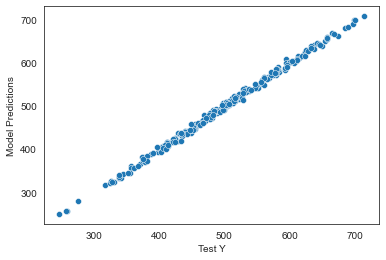

In [36]:
sns.set_style('white')
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

Let's compare to the real test labels!

/Users/parthamehta/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Error', ylabel='Density'>

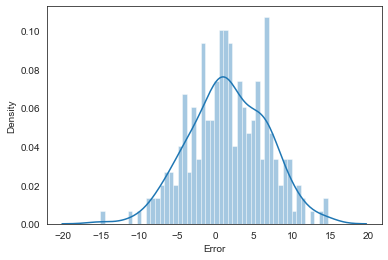

In [37]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']
sns.distplot(pred_df['Error'],bins=50)

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [39]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.242072281607589

In [40]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

28.0581514897376

In [41]:
# Essentially the same thing, difference just due to precision
test_score

28.05811309814453

In [42]:
#RMSE
test_score**0.5

5.29699094752337

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [43]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [44]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.52980619]])

In [45]:
new_gem = scaler.transform(new_gem)

In [46]:
model.predict(new_gem)

array([[418.15146]], dtype=float32)

## Saving and Loading a Model

In [47]:
from tensorflow.keras.models import load_model

In [48]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [49]:
later_model = load_model('my_model.h5')

In [50]:
later_model.predict(new_gem)

array([[418.15146]], dtype=float32)